In [1]:
# Imports

from api import RandomUserAPI
import utilities
import pandas as pd
import numpy as np

**Etapa 1: Entendendo os dados**

Consome a API na URL https://randomuser.me/api/ e retorna um dicionário com os dados

In [2]:
generator = RandomUserAPI()

# excluindo a categoria "login" do resultado
blacklist = ['login']
generator.update_blacklist(["login"])

# obtendo o dicionario
consulta = generator.request(n = 1, as_dataframe=False)
consulta

{'gender': ['female'],
 'name_title': ['Ms'],
 'name_first': ['Ariane'],
 'name_last': ['Knight'],
 'location_street_number': [5888],
 'location_street_name': ['Grand Ave'],
 'location_city': ['Hampstead'],
 'location_state': ['Prince Edward Island'],
 'location_country': ['Canada'],
 'location_postcode': ['G1H 8O0'],
 'location_coordinates_latitude': ['-66.4400'],
 'location_coordinates_longitude': ['107.2742'],
 'location_timezone_offset': ['+5:30'],
 'location_timezone_description': ['Bombay, Calcutta, Madras, New Delhi'],
 'email': ['ariane.knight@example.com'],
 'dob_date': ['1958-02-01T11:40:17.275Z'],
 'dob_age': [64],
 'registered_date': ['2004-06-18T23:34:15.265Z'],
 'registered_age': [18],
 'phone': ['X75 W72-1464'],
 'cell': ['Y61 V00-0264'],
 'id_name': ['SIN'],
 'id_value': ['523787679'],
 'picture_large': ['https://randomuser.me/api/portraits/women/91.jpg'],
 'picture_medium': ['https://randomuser.me/api/portraits/med/women/91.jpg'],
 'picture_thumbnail': ['https://random

**Etapa 2: Coletando dados**

Coleta uma quantidade N de dados da API, manipula para montar um pandas.DataFrame e salva o resultado em um arquivo CSV.

In [3]:
# Gera um DataFrame com a consulta
consulta2 = generator.request(n = 500, as_dataframe=True)
consulta2
consulta2.head(10) # Visualiza os 10 primeiros

,gender,name_title,name_first,name_last,location_street_number,location_street_name,location_city,location_state,location_country,location_postcode,...,registered_date,registered_age,phone,cell,id_name,id_value,picture_large,picture_medium,picture_thumbnail,nat
0,male,Mr,Gabriel,Gonzales,8125,Retorno Croacia,Jiquipilco,Puebla,Mexico,52041,...,2014-10-07T22:46:13.720Z,8,(676) 716 3354,(641) 770 8550,NSS,67 24 50 5883 9,https://randomuser.me/api/portraits/men/28.jpg,https://randomuser.me/api/portraits/med/men/28...,https://randomuser.me/api/portraits/thumb/men/...,MX
1,male,Mr,Ishwar,Rai,2798,Dadabhai Naoroji Rd,Ujjain,Dadra and Nagar Haveli,India,31050,...,2016-05-21T19:53:24.970Z,6,7812234523,9338268758,UIDAI,597462518010,https://randomuser.me/api/portraits/men/5.jpg,https://randomuser.me/api/portraits/med/men/5.jpg,https://randomuser.me/api/portraits/thumb/men/...,IN
2,male,Mr,Gaëtan,Martinez,168,Avenue du Fort-Caire,Limoges,Maine-et-Loire,France,51441,...,2021-01-09T08:58:13.042Z,1,02-80-85-85-66,06-95-70-45-08,INSEE,1840774441029 89,https://randomuser.me/api/portraits/men/10.jpg,https://randomuser.me/api/portraits/med/men/10...,https://randomuser.me/api/portraits/thumb/men/...,FR
3,male,Mr,Aiden,Kowalski,1768,West Ave,Southampton,Saskatchewan,Canada,H7B 6O9,...,2013-08-27T04:34:01.485Z,9,R80 P08-5692,M10 O41-9392,SIN,674109061,https://randomuser.me/api/portraits/men/72.jpg,https://randomuser.me/api/portraits/med/men/72...,https://randomuser.me/api/portraits/thumb/men/...,CA
4,female,Mrs,Diane,Stevens,2259,Elgin St,Desoto,Delaware,United States,25227,...,2016-02-25T14:51:58.116Z,6,(785) 740-4420,(997) 401-9877,SSN,880-46-5503,https://randomuser.me/api/portraits/women/36.jpg,https://randomuser.me/api/portraits/med/women/...,https://randomuser.me/api/portraits/thumb/wome...,US
5,female,Ms,Maïwenn,Duval,8117,Rue de L'Abbé-Gillet,Toulon,Charente-Maritime,France,61057,...,2003-04-06T22:52:01.921Z,19,03-92-67-12-04,06-06-65-00-25,INSEE,2460836956491 29,https://randomuser.me/api/portraits/women/92.jpg,https://randomuser.me/api/portraits/med/women/...,https://randomuser.me/api/portraits/thumb/wome...,FR
6,female,Mrs,Neea,Halla,1376,Pispalan Valtatie,Aura,Central Ostrobothnia,Finland,71569,...,2013-03-12T21:37:03.560Z,9,02-686-947,041-200-01-97,HETU,NaNNA172undefined,https://randomuser.me/api/portraits/women/56.jpg,https://randomuser.me/api/portraits/med/women/...,https://randomuser.me/api/portraits/thumb/wome...,FI
7,female,Ms,Felecia,Kim,331,W Pecan St,Gladstone,South Australia,Australia,3023,...,2020-07-06T03:00:29.622Z,2,07-6370-1542,0427-746-242,TFN,935305050,https://randomuser.me/api/portraits/women/24.jpg,https://randomuser.me/api/portraits/med/women/...,https://randomuser.me/api/portraits/thumb/wome...,AU
8,female,Miss,Brandie,Ramirez,2912,Spring St,Independence,Rhode Island,United States,53018,...,2021-08-21T23:38:17.292Z,1,(903) 666-0442,(437) 526-2812,SSN,365-22-0827,https://randomuser.me/api/portraits/women/6.jpg,https://randomuser.me/api/portraits/med/women/...,https://randomuser.me/api/portraits/thumb/wome...,US
9,female,Mrs,Olivia,Wang,7596,Mt Eden Road,Dunedin,Hawke'S Bay,New Zealand,97042,...,2010-10-23T01:10:36.309Z,12,(219)-245-1514,(562)-806-3141,,None,https://randomuser.me/api/portraits/women/75.jpg,https://randomuser.me/api/portraits/med/women/...,https://randomuser.me/api/portraits/thumb/wome...,NZ


In [4]:
# Salva as informacoes em um arquivo csv localizado na mesma pasta do Notebook
destino = "consulta_RandomUserAPI.csv"
consulta2.to_csv(destino, index = False)

**Etapa 3: Manipulando dados**

Converte a formatacao nacional dos contatos fornecidos para um único formato em comum.
Foramto escolhido foi o E164, composto por:

    +(Country Code) (Area Code) (Subscriber Code)

    Exemplo: +55 21 12345678

In [5]:
formatado = utilities.format_phonenumber(consulta2)
colunas = ["gender", "name_first", "location_country", "cell", "phone", "nat"]

formatado[colunas]

,gender,name_first,location_country,cell,phone,nat
0,male,Gabriel,Mexico,+52 641 7708550,+52 676 7163354,MX
1,male,Ishwar,India,+91 93382 68758,+91 781 2234523,IN
2,male,Gaëtan,France,+33 6 95704508,+33 2 80858566,FR
3,male,Aiden,Canada,+1 M10 O419392,+1 R80 P085692,CA
4,female,Diane,United States,+1 997 4019877,+1 785 7404420,US
...,...,...,...,...,...,...
495,male,Jackson,Ireland,+353 81 8782489,+353 31 3230610,IE
496,female,Marina,Norway,+47 47938396,+47 35773188,NO
497,female,Inmaculada,Spain,+34 609 212730,+34 901 638457,ES
498,male,Necati,Netherlands,+31 6 29203666,+31 02 5753894,NL


**Etapa 4: Analisando dados sem agrupamento**

Uma função que recebe, como parâmetro, um pandas.DataFrame e gera dois arquivos: um relatório em texto e outro contendo um gráfico de distribuição da idade dos usuários.

In [6]:
# Gera e salva um relatorio em um arquivo txt
destino = "relatorio.txt"
utilities.relatorio(df = formatado, fname = destino)

# Lendo o relatorio salvo
with open(destino, 'r') as textfile:
    linhas = textfile.readlines()
    print(*linhas)


 ----------------------------------------------------------------------
 INFORMAÇÕES GERAIS
 ----------------------------------------------------------------------
 
 Random User Generator API v1.4
 Usuarios na amostra = 500
 Data & Hora: 14/11/2022 00:22
 
 ----------------------------------------------------------------------
 RELATÓRIO
 ----------------------------------------------------------------------
 
 Ao todo, 51.40% da amostra é composta por usuários do sexo masculino
 enquanto os 48.60% restantes são compostos por usuários do sexo feminino.
 
 A distribuicao de usuários por país é a que segue:
 Australia            -> 5.00%
 Brazil               -> 5.60%
 Canada               -> 4.00%
 Denmark              -> 2.80%
 Finland              -> 4.60%
 France               -> 4.20%
 Germany              -> 4.80%
 India                -> 6.00%
 Iran                 -> 4.20%
 Ireland              -> 3.60%
 Mexico               -> 4.00%
 Netherlands          -> 5.80%
 New Zealand 

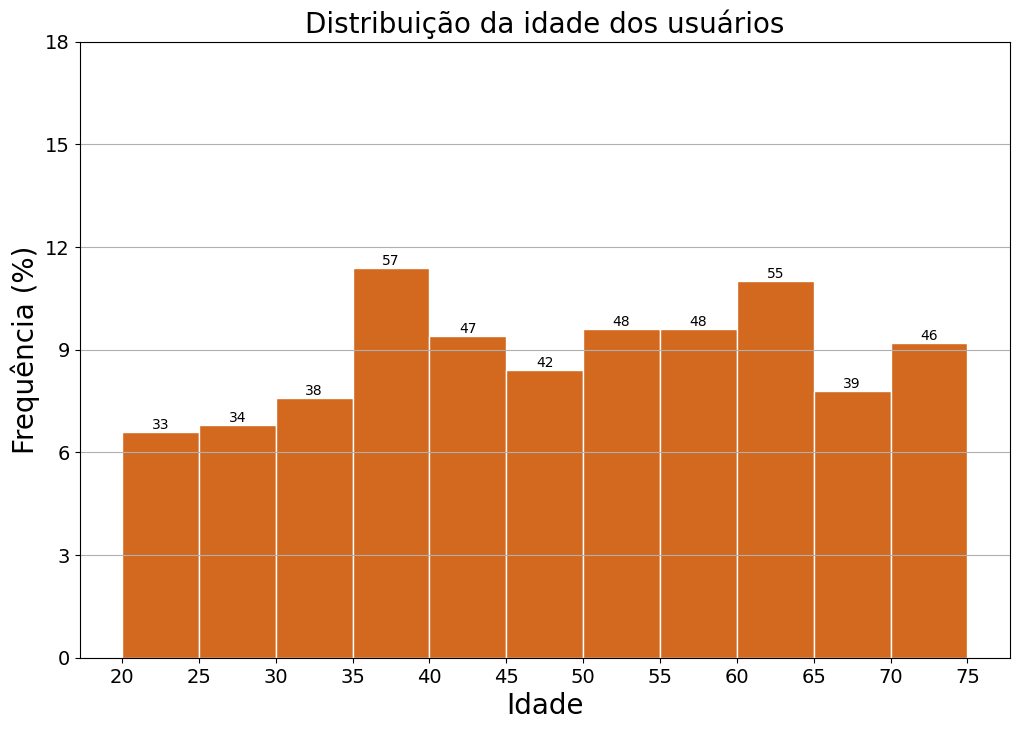

In [7]:
# Gerando uma figura com a distribuicao de usuarios por idade
destino = "Distribuicao por idade.png" # nome da figura a ser salva
utilities.age_histogram(df = formatado, fname = destino, dx = 5)

**Etapa 5: Analisando dados com agrupamento**

uma função que recebe, como parâmetro, um pandas.DataFrame e retorna um pandas.DataFrame com as mesmas colunas, mas com os dados agrupados por país e estado.

In [8]:
# Agrupa e retorna um DataFrame com a quantidade de usuários por grupo e 
# uma nova coluna com uma "lista" contendo a referencia para cada usuario.
# a referencia é o índice de cada linha do DataFrame original

agrupado = utilities.groupby_country_state(formatado)
agrupado # Padrao é ordenar em ordem decrescente pelo "user_count"

,location_country,location_state,user_count,users
0,Australia,Australian Capital Territory,7,"[69, 125, 230, 242, 282, 363, 402]"
37,Denmark,Sjælland,6,"[11, 216, 288, 298, 307, 434]"
17,Brazil,Piauí,5,"[118, 119, 133, 371, 406]"
3,Australia,Queensland,5,"[74, 229, 433, 454, 487]"
161,New Zealand,Bay of Plenty,5,"[70, 180, 218, 305, 389]"
...,...,...,...,...
175,Norway,Hordaland,1,[285]
176,Norway,Nordland,1,[210]
177,Norway,Oppland,1,[159]
178,Norway,Oslo,1,[65]


In [9]:
# Exemplo de aplicação -> Encontrar os usuarios que moram no país/estado
# com maior número de usuários registrados

# o DataFrame ja esta ordenado em ordem decrescente 
busca = formatado.iloc[agrupado["users"].iloc[0]]
busca

,gender,name_title,name_first,name_last,location_street_number,location_street_name,location_city,location_state,location_country,location_postcode,...,registered_age,phone,cell,id_name,id_value,picture_large,picture_medium,picture_thumbnail,nat,user_id
69,male,Mr,Craig,Miles,7152,Mcgowen St,Toowoomba,Australian Capital Territory,Australia,9223,...,1,+61 1 73134733,+61 419 002856,TFN,212372640,https://randomuser.me/api/portraits/men/77.jpg,https://randomuser.me/api/portraits/med/men/77...,https://randomuser.me/api/portraits/thumb/men/...,AU,69
125,female,Ms,Cindy,Mitchelle,782,Avondale Ave,Bendigo,Australian Capital Territory,Australia,7037,...,12,+61 0 98296285,+61 476 204256,TFN,914357935,https://randomuser.me/api/portraits/women/14.jpg,https://randomuser.me/api/portraits/med/women/...,https://randomuser.me/api/portraits/thumb/wome...,AU,125
230,male,Mr,Philip,Wright,324,W Sherman Dr,Sydney,Australian Capital Territory,Australia,7480,...,2,+61 4 45201361,+61 400 618601,TFN,230198533,https://randomuser.me/api/portraits/men/53.jpg,https://randomuser.me/api/portraits/med/men/53...,https://randomuser.me/api/portraits/thumb/men/...,AU,230
242,male,Mr,Jordan,Gray,1690,Plum St,Australian Capital Territory,Australian Capital Territory,Australia,4207,...,9,+61 7 90119217,+61 441 054363,TFN,399989715,https://randomuser.me/api/portraits/men/51.jpg,https://randomuser.me/api/portraits/med/men/51...,https://randomuser.me/api/portraits/thumb/men/...,AU,242
282,female,Ms,Violet,Smith,4089,Lone Wolf Trail,Devonport,Australian Capital Territory,Australia,8625,...,20,+61 6 54473691,+61 473 257129,TFN,392651639,https://randomuser.me/api/portraits/women/62.jpg,https://randomuser.me/api/portraits/med/women/...,https://randomuser.me/api/portraits/thumb/wome...,AU,282
363,male,Mr,Adam,Watson,6459,Pecan Acres Ln,Geraldton,Australian Capital Territory,Australia,8065,...,6,+61 1 00666957,+61 433 123403,TFN,369700620,https://randomuser.me/api/portraits/men/15.jpg,https://randomuser.me/api/portraits/med/men/15...,https://randomuser.me/api/portraits/thumb/men/...,AU,363
402,male,Mr,Tony,Nelson,2958,Wycliff Ave,Nowra,Australian Capital Territory,Australia,1918,...,17,+61 6 70668029,+61 456 810358,TFN,684063615,https://randomuser.me/api/portraits/men/84.jpg,https://randomuser.me/api/portraits/med/men/84...,https://randomuser.me/api/portraits/thumb/men/...,AU,402
